# Principle Component Analysis

Adapted from : https://builtin.com/machine-learning/pca-in-python

In [38]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from numpy import linalg as la 
from itertools import chain
import collections

In [39]:
df=pd.read_csv("normalized_feature_select_batch.csv") # this data contains approx 500 features

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
features = pd.read_csv("Sheet 1-Table 1.csv") #initialising the columns in the data as features

In [42]:
f = features.to_numpy() #converting dataframe to numpy array
f_1 = f.flatten() #to convert a multidimentional array f to a single array f_1

### df.loc[ ]  :
used to access a group of rows and columns by label(s) or a boolean array

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html

In [43]:
#accessing values of the entire columns in f_1 and storing in x
x = df.loc[:, f_1].values # Separating out the features
#accessing values of the entire column of Metadata_Welll and storing in y
y = df.loc[:,['Metadata_Well']].values #Separating out target

### STANDARDIZE THE DATA
PCA is affected by scale, so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the data set’s features onto unit scale (mean = 0 and variance = 1), which is a requirement for the optimal performance of many machine learning algorithms. If you don’t scale your data, it can have a negative effect on your algorithm. 

StandardScaler() : Standardize features by removing the mean and scaling to unit variance.

fit_transform(x) : Fit to data, then transform it.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [44]:
x_1 = StandardScaler().fit_transform(x) 

## 2 Component PCA
The new components are just the two main dimensions of variation

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x_1)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [46]:
finalDf = pd.concat([principalDf, df[['Metadata_Well']]], axis = 1)
finalDf

,principal component 1,principal component 2,Metadata_Well
0,-14.578547,9.409380,A01
1,-14.052876,10.185065,A02
2,-13.156311,8.582893,A03
3,-14.557101,10.365744,A04
4,0.557168,9.461086,A05
...,...,...,...
379,11.018818,-10.974743,P20
380,10.207874,-12.845271,P21
381,11.965622,-12.500212,P22
382,12.503905,-11.346363,P23


In [47]:
Metadata_Well = pd.read_csv("normalized_feature_select_batch.csv", usecols = ['Metadata_Well'])
MW = Metadata_Well.to_numpy()
MW = MW.flatten()

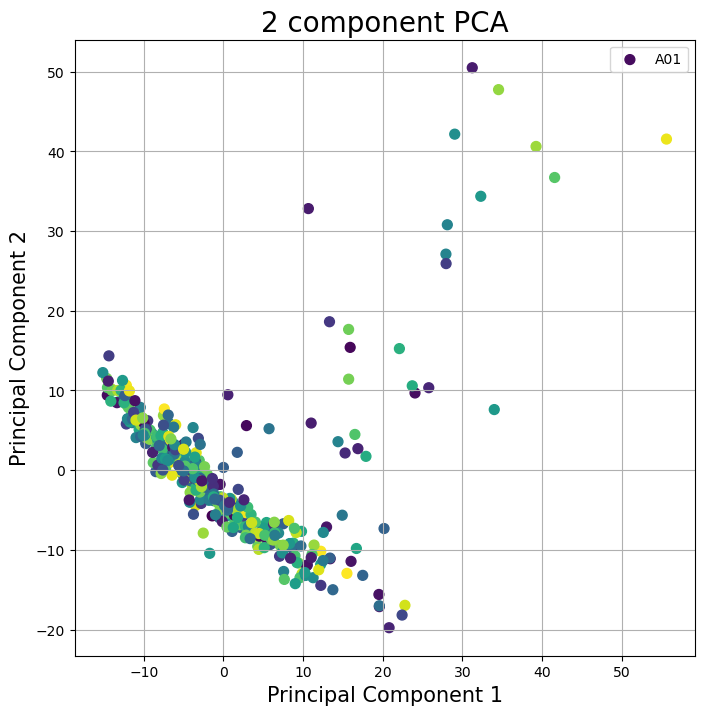

In [48]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
N = 384
colors = np.random.rand(N)
indicesToKeep = finalDf['Metadata_Well'] == MW
ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'],finalDf.loc[indicesToKeep, 'principal component 2'], c = colors, s = 50)
ax.legend(MW)
ax.grid()


### EXPLAINED VARIANCE
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important because while you can convert four-dimensional space to a two-dimensional space, you lose some of the variance (information) when you do this.

In [49]:
pca.explained_variance_ratio_

array([0.22281402, 0.18196501])

## 3 Component PCA

In [50]:
pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x_1)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

In [51]:
finalDf = pd.concat([principalDf, df[['Metadata_Well']]], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,Metadata_Well
0,-14.578547,9.409380,-1.676595,A01
1,-14.052876,10.185065,-7.137263,A02
2,-13.156311,8.582893,-2.161181,A03
3,-14.557101,10.365744,-6.562398,A04
4,0.557168,9.461086,2.261844,A05
...,...,...,...,...
379,11.018818,-10.974743,3.896756,P20
380,10.207874,-12.845271,9.087382,P21
381,11.965622,-12.500212,5.450503,P22
382,12.503905,-11.346363,4.418044,P23


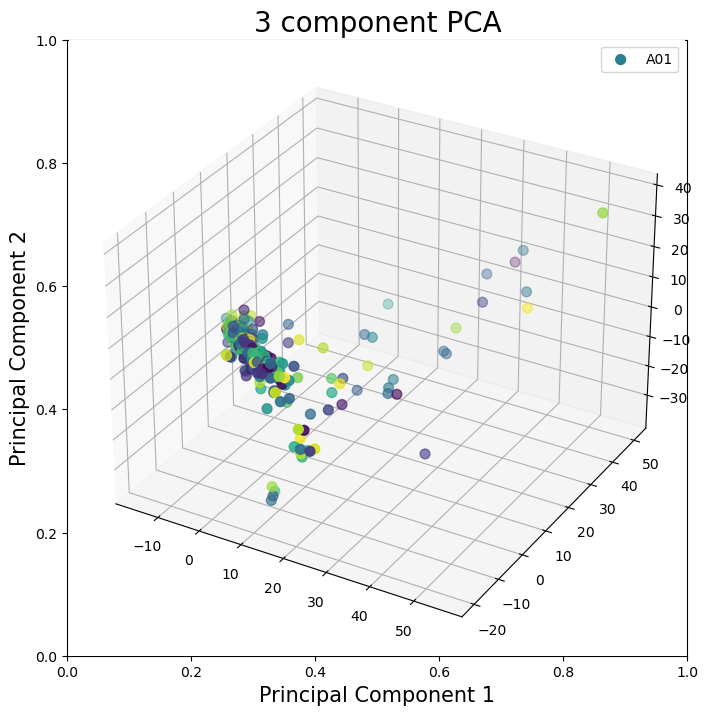

In [52]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)
ax = plt.axes(projection ="3d")
N = 384
colors = np.random.rand(N)
indicesToKeep = finalDf['Metadata_Well'] == MW
ax.scatter3D(finalDf.loc[indicesToKeep,'principal component 1'],finalDf.loc[indicesToKeep, 'principal component 2'],finalDf.loc[indicesToKeep, 'principal component 3'], c = colors, s = 50)
ax.legend(MW)
ax.grid()


In [53]:
pca.explained_variance_ratio_

array([0.22281402, 0.18196501, 0.08224385])

## n-component PCA

In [54]:
N = len(f_1)

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 384)
c = map(str, range(384))
principalComponents = pca.fit_transform(x_1)

principalDf = pd.DataFrame(data = principalComponents
             , columns = c)

In [56]:
finalDf = pd.concat([principalDf, df[['Metadata_Well']]], axis = 1)
finalDf

,0,1,2,3,4,5,6,7,8,9,...,375,376,377,378,379,380,381,382,383,Metadata_Well
0,-14.578547,9.409380,-1.676595,-3.306254,-1.378054,-1.498532,3.797604,2.982272,1.213399,-1.418764,...,-0.009523,0.010521,0.029330,-0.011338,-0.000297,-0.027854,-0.008326,-0.004918,4.640230e-15,A01
1,-14.052876,10.185065,-7.137263,-3.662732,-1.541077,-0.618076,1.817575,3.253425,0.735073,0.134464,...,-0.001196,0.028689,-0.005655,0.008450,-0.002988,-0.006249,-0.018566,-0.006929,4.640230e-15,A02
2,-13.156311,8.582893,-2.161181,-3.893135,0.592883,1.693272,1.072671,2.167554,-0.244656,0.866453,...,0.017799,0.008874,-0.025931,0.024465,-0.015250,0.016804,0.013927,-0.013638,4.640230e-15,A03
3,-14.557101,10.365744,-6.562398,-3.994865,-3.699694,-0.914028,0.193575,3.793532,0.305188,-1.043820,...,0.022445,-0.014738,-0.008107,-0.003997,-0.019463,0.023060,0.018031,0.014189,4.640230e-15,A04
4,0.557168,9.461086,2.261844,-4.833783,3.746178,0.384468,-1.800237,-6.661669,-9.264643,16.939430,...,-0.000166,0.002949,-0.007166,0.004614,-0.006185,-0.006049,0.003103,-0.009817,4.640230e-15,A05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,11.018818,-10.974743,3.896756,-0.319773,-2.143584,-7.137710,3.352761,2.514072,-2.267144,-4.282139,...,0.014331,0.032167,0.006724,0.005050,0.011700,0.010712,-0.006346,0.001925,4.640230e-15,P20
380,10.207874,-12.845271,9.087382,-0.007003,-0.525561,-1.311545,2.691445,0.406216,-0.223511,-2.043605,...,-0.003342,0.003579,-0.005420,0.000464,0.003691,-0.000625,0.006987,0.001497,4.640230e-15,P21
381,11.965622,-12.500212,5.450503,1.909157,0.396863,-4.675724,2.705424,0.164527,-0.896509,-1.939214,...,-0.000186,0.005548,0.012259,-0.000696,-0.005036,-0.005699,-0.002916,-0.004478,4.640230e-15,P22
382,12.503905,-11.346363,4.418044,-0.443847,-1.553087,-5.507781,3.186632,1.760135,-0.926186,-3.661713,...,-0.012511,-0.021757,0.002671,0.001131,-0.005715,0.004625,0.002092,0.011428,4.640230e-15,P23


In [57]:
a = pca.explained_variance_ratio_

In [58]:
np.max(a)

0.22281402452026444

In [59]:
np.min(a)

4.394231826974813e-32

In [60]:
np.cumsum(a)

array([0.22281402, 0.40477903, 0.48702289, 0.54875153, 0.59475611,
       0.6305729 , 0.65908225, 0.6846631 , 0.70868336, 0.73161016,
       0.75133944, 0.76873439, 0.78429903, 0.79806487, 0.80909828,
       0.81935687, 0.82842102, 0.83733265, 0.84470722, 0.85152029,
       0.85803899, 0.86378598, 0.86910851, 0.87422595, 0.87912788,
       0.88379961, 0.88820114, 0.89244134, 0.89615858, 0.89970278,
       0.90310082, 0.9063333 , 0.90930876, 0.91212074, 0.91472943,
       0.91721149, 0.91967645, 0.92196248, 0.92412579, 0.92622249,
       0.92828644, 0.93025384, 0.9321975 , 0.93409253, 0.93590467,
       0.93764495, 0.93931451, 0.94086637, 0.94232935, 0.94375878,
       0.9451353 , 0.94642625, 0.94770024, 0.94895222, 0.95012575,
       0.95128794, 0.95242291, 0.95351515, 0.95460587, 0.95565457,
       0.95666101, 0.9576352 , 0.95859373, 0.95951986, 0.96042157,
       0.96130215, 0.96215076, 0.9629723 , 0.96376134, 0.96454178,
       0.96529478, 0.96603438, 0.96675454, 0.96745994, 0.96814

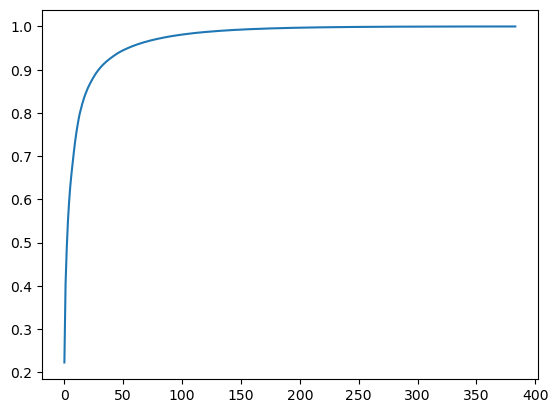

In [61]:
plt.plot(np.cumsum(a))

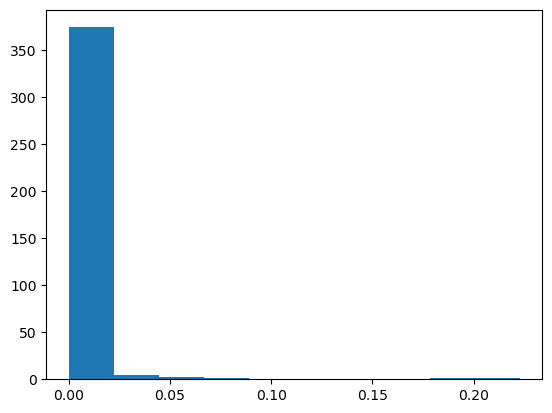

In [62]:
plt.hist(a)
plt.show() 

## pca.inverse_transform


In [63]:
y = pca.inverse_transform

In [64]:
z = (pca.inverse_transform(principalDf))
h = pd.DataFrame(data = z
             , columns = f_1)

In [65]:
h

,Cells_AreaShape_BoundingBoxMinimum_X,Cells_AreaShape_Compactness,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_Solidity,Cells_AreaShape_Zernike_1_1,Cells_AreaShape_Zernike_2_0,Cells_AreaShape_Zernike_2_2,Cells_AreaShape_Zernike_3_1,Cells_AreaShape_Zernike_3_3,...,Nuclei_Texture_InfoMeas1_DNA_5_02_256,Nuclei_Texture_InfoMeas1_ER_5_02_256,Nuclei_Texture_InfoMeas1_Mito_5_02_256,Nuclei_Texture_InfoMeas1_RNA_5_02_256,Nuclei_Texture_InfoMeas2_AGP_5_00_256,Nuclei_Texture_SumAverage_DNA_20_01_256,Nuclei_Texture_SumAverage_DNA_20_03_256,Nuclei_Texture_SumEntropy_RNA_20_01_256,Nuclei_Texture_SumVariance_RNA_20_01_256,Nuclei_Texture_SumVariance_RNA_20_03_256
0,1.149376,-0.822178,0.452303,0.937805,0.065933,0.067319,0.626746,0.042886,-0.906943,0.432682,...,0.552526,0.884703,1.542050,1.191515,-0.982807,0.023317,-0.039378,-0.562289,-0.305863,-0.397287
1,0.453520,-0.719889,0.194731,0.787169,-0.098717,-0.096136,0.306351,0.422912,0.011359,0.239387,...,0.361173,1.066338,1.129178,0.922703,-0.714924,0.061886,0.040832,0.803496,0.091550,0.154178
2,1.357261,-0.823235,0.305177,0.939156,0.167933,0.420076,0.248516,0.101553,-0.399315,1.268203,...,0.585053,1.283216,1.517500,1.085695,-1.215606,-0.027262,-0.018918,0.513281,0.037576,0.075308
3,0.105576,-0.670218,0.285174,0.716022,-0.118911,0.081641,0.294784,0.334192,-0.422530,0.502014,...,0.419387,1.088580,1.037612,0.958996,-0.899586,-0.367837,-0.365115,0.576755,0.009784,0.039818
4,-0.097767,1.109838,-1.041465,-1.240048,-2.674112,-0.697031,-0.546134,0.276106,0.844658,0.359841,...,-0.224893,1.791346,1.428114,0.837367,0.424486,1.436853,1.607276,2.055272,0.725220,1.194318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-1.326887,0.862276,-1.131898,-1.022951,-0.149975,0.807715,-0.564660,0.924324,0.967862,-1.421131,...,-0.603259,-0.587874,-1.014880,-0.982237,-0.129917,-1.106810,-1.054244,-0.499376,-0.266420,-0.368779
380,3.218980,1.253182,0.261833,-1.359621,0.141009,-1.264636,0.779432,-0.987076,-0.996069,0.239387,...,-0.197199,-0.166884,-0.088395,0.161288,-0.282875,-1.579992,-1.560271,-1.646322,-0.468189,-0.606440
381,-0.549640,0.602664,0.024266,-0.779384,0.690371,-2.110252,0.511087,-0.040919,-1.035389,-0.504364,...,-0.460794,-0.398509,-1.447781,-0.654383,0.300434,-0.607355,-0.613563,-0.906704,-0.362921,-0.426317
382,0.950602,0.921082,-0.049507,-1.075828,0.094928,-0.479714,-0.097324,-0.709647,1.608413,-0.042847,...,-0.676765,-0.691247,-1.044834,-0.687139,0.064034,-0.856395,-0.967508,-0.585817,-0.307299,-0.422985


https://stackoverflow.com/questions/55533116/pca-inverse-transform-in-sklearn

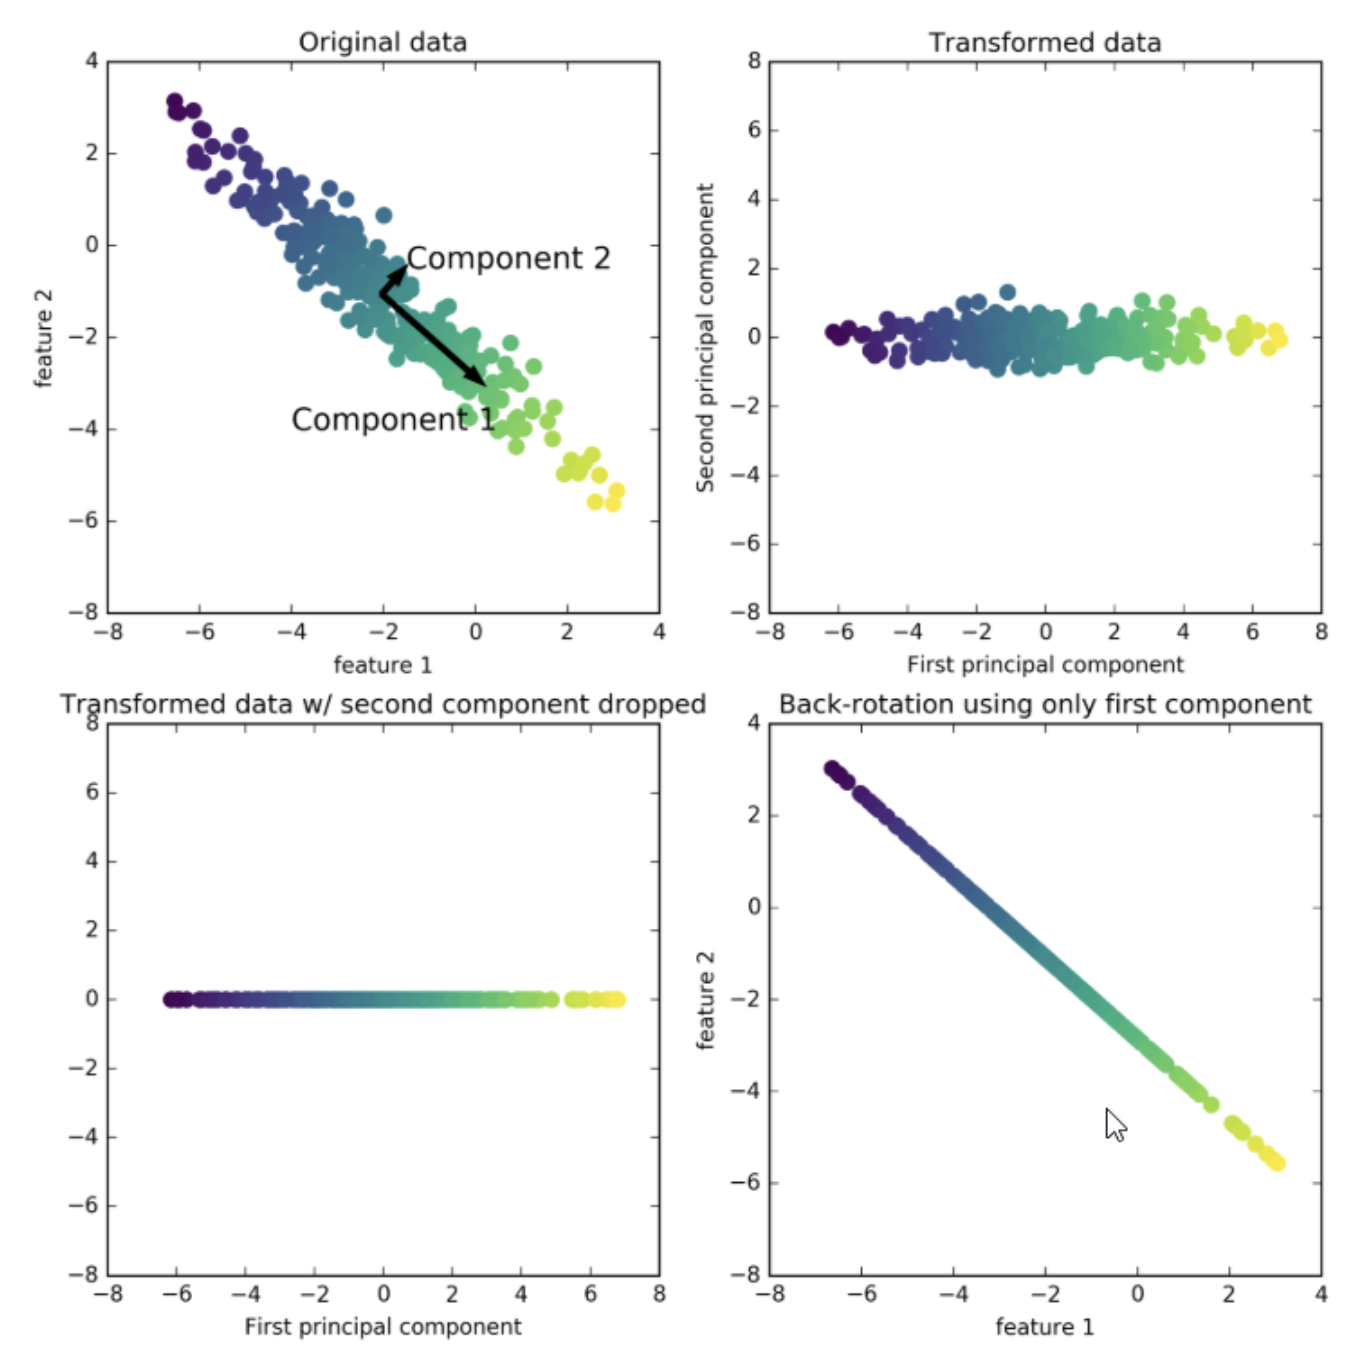
